<a href="https://colab.research.google.com/github/ghodsieh86/ghodsieh6220project/blob/main/6300.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error
import itertools
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

Real demand data

In [64]:
demand_data = [1.465, 1.457, 1.832, 2.009, 2.131, 2.012, 1.893, 1.821, 1.585, 1.6, 1.756, 2.021,
               1.752, 1.824, 1.89, 1.998, 1.965, 1.91, 1.894, 1.653, 1.896, 1.688, 1.932, 2.01]

Time index

In [65]:
time_index = pd.date_range(start='2022-01-01', periods=len(demand_data), freq='M')

Pandas datafram with demand data and time index

In [66]:
df = pd.DataFrame({'demand': demand_data}, index=time_index)

Function to perform holtwinter demand forcasting with given parameters

In [67]:
def holt_winters_forecast(alpha, beta, gamma):
    model = ExponentialSmoothing(df['demand'], trend='add', seasonal='add', seasonal_periods=12)
    result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
    forecast = result.forecast(steps=24)
    return forecast

Function to calculate MAE

In [68]:
def calculate_mae(actual, forecast):
    return mean_absolute_error(actual, forecast)

Prameter combination for sensitivity analysis

In [69]:
alpha_values = [0.1, 0.4, 0.8]
beta_values = [0.1, 0.4, 0.8]
gamma_values = [0.1, 0.4, 0.8]


Perform sensitivity analysis

In [9]:
best_mae = float('inf')
best_params = None

for alpha, beta, gamma in itertools.product(alpha_values, beta_values, gamma_values):
    forecast = holt_winters_forecast(alpha, beta, gamma)
    mae = calculate_mae(df['demand'], forecast)

    print(f'Alpha={alpha}, Beta={beta}, Gamma={gamma}')
    print('MAE:', mae)

<ipython-input-6-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-6-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-6-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-6-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-6-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

Alpha=0.1, Beta=0.1, Gamma=0.1
MAE: 0.12797802141515355
Alpha=0.1, Beta=0.1, Gamma=0.4
MAE: 0.12620017329755998
Alpha=0.1, Beta=0.1, Gamma=0.8
MAE: 0.1383108239711521
Alpha=0.1, Beta=0.4, Gamma=0.1
MAE: 0.08026099089062938
Alpha=0.1, Beta=0.4, Gamma=0.4
MAE: 0.08237496832183351
Alpha=0.1, Beta=0.4, Gamma=0.8
MAE: 0.11178833326446987
Alpha=0.1, Beta=0.8, Gamma=0.1
MAE: 0.17881842326376565
Alpha=0.1, Beta=0.8, Gamma=0.4
MAE: 0.2714133176192131
Alpha=0.1, Beta=0.8, Gamma=0.8
MAE: 0.3419321995058477
Alpha=0.4, Beta=0.1, Gamma=0.1
MAE: 0.21046715239289218
Alpha=0.4, Beta=0.1, Gamma=0.4
MAE: 0.22579208156254535
Alpha=0.4, Beta=0.1, Gamma=0.8
MAE: 0.23400055509483073
Alpha=0.4, Beta=0.4, Gamma=0.1
MAE: 0.43879342039384817
Alpha=0.4, Beta=0.4, Gamma=0.4
MAE: 0.36672170645188196
Alpha=0.4, Beta=0.4, Gamma=0.8
MAE: 0.28455175856032583
Alpha=0.4, Beta=0.8, Gamma=0.1
MAE: 0.19636863324766354
Alpha=0.4, Beta=0.8, Gamma=0.4
MAE: 0.35504623414219266
Alpha=0.4, Beta=0.8, Gamma=0.8
MAE: 0.3049695442325

<ipython-input-6-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-6-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-6-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-6-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-6-fcce4267663c>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  

plotting actual vs. forcasted

TypeError: ignored

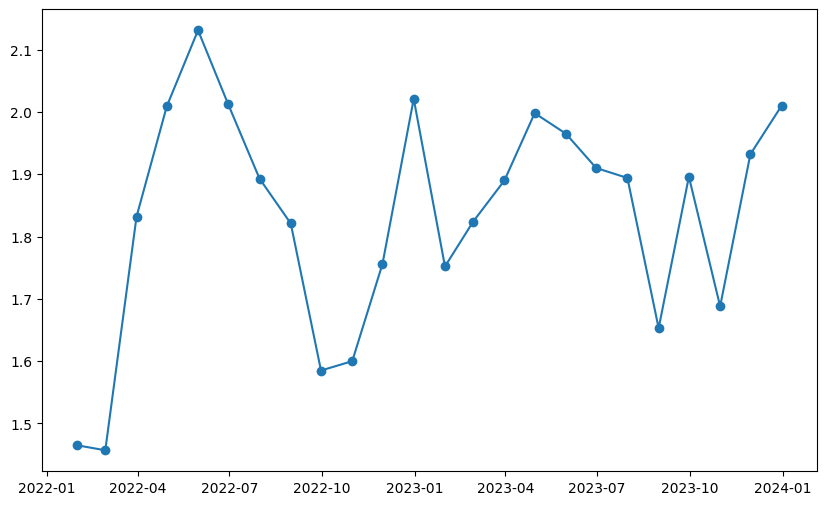

In [70]:
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['demand'], label='Actual Demand', marker='o')
    plt.plot(df.index[-1] + pd.DateOffset(months=1) + pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=24, freq='M'), forecast, label='Forecasted Demand', marker='o')
    plt.title(f'Holt-Winters Forecasting - Alpha={alpha}, Beta={beta}, Gamma={gamma}')
    plt.xlabel('Time')
    plt.ylabel('Demand')
    plt.legend()
    plt.show()

    print('\n')

Best parameter if the current combination yiels a lower MAE

In [71]:
 if mae < best_mae:
        best_mae = mae
        best_params = (alpha, beta, gamma)

print(f'Best Parameters: Alpha={best_params[0]}, Beta={best_params[1]}, Gamma={best_params[2]}')

Best Parameters: Alpha=0.1, Beta=0.1, Gamma=0.1


calculate residuals

In [72]:
import matplotlib.pyplot as plt

In [73]:
residuals = df['demand'] - forecast

In [74]:
if len(df['demand']) != len(forecast):
    raise ValueError("Length mismatch between df['demand'] and forecast")

Plot residuals over time

ValueError: ignored

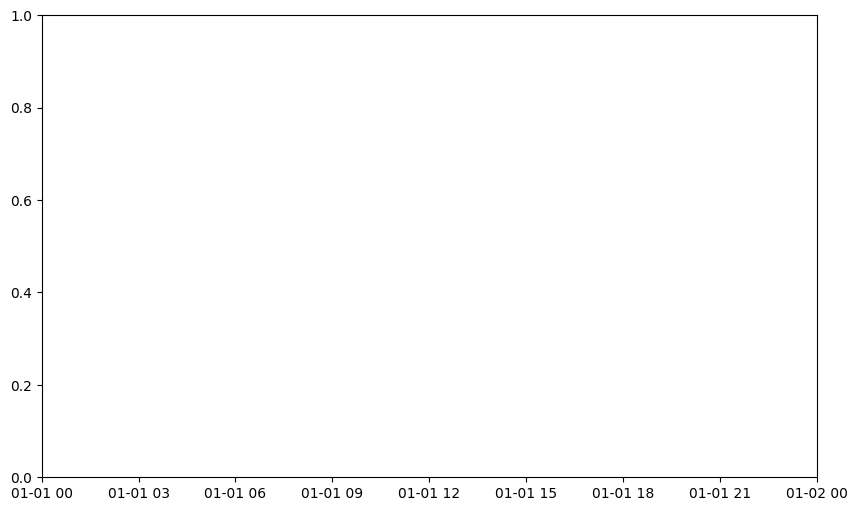

In [75]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, residuals, label='Residuals', marker='o')
plt.axhline(0, color='red', linestyle='--', label='Zero Residuals')
plt.title('Residual Plot')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()